<a href="https://colab.research.google.com/github/AzizahBsyrh/FSD_DimensionalityReduction/blob/main/Tugas_Praktik_Dimensionality_Reduction_(PCA_%26_t_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Praktik: Dimensionality Reduction (PCA & t-SNE)

Nama:


*   Nur Azizah Basyirah Syamsuddin (24523238)
*   Naila Reyhantyas Nurkhalisha (24523050)



**A. MENENTUKAN KASUS**

Visualisasi data berdimensi tinggi dan eksplorasi pola pasien penyakit jantung

**B. PENJELASAN KASUS**

Masalah yang Dihadapi:

* Dataset heart disease terdiri dari 13 fitur medis dan satu label target yang menunjukkan ada atau tidaknya penyakit jantung.

* Data kesehatan pasien memiliki banyak atribut numerik dan kategorikal sehingga:

* Sulit divisualisasikan secara langsung

* Pola pemisahan pasien sehat dan sakit jantung tidak terlihat jelas

* Hubungan antar fitur medis kompleks

Mengapa Dimensionality Reduction Dibutuhkan:

* Untuk memvisualisasikan data pasien dalam ruang 2D

* Untuk mengeksplorasi pola dan kecenderungan cluster

* Untuk mengurangi kompleksitas data tanpa menghilangkan informasi utama

* Sebagai analisis awal sebelum pemodelan klasifikasi

**C. PENERAPAN PCA DAN T-SNE**

**1. Import Library**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**2. Load Dataset**

In [71]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**3. Memisahkan Fitur dan Label**

In [72]:
X = df.drop("target", axis=1)
y = df["target"]

**4. Standarisasi Data**

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**5. Principal Component Analysis (PCA)**



*   Menerapkan PCA (Reduksi Ke 2 Dimensi)



In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



*   Variansi yang Dijelaskan oleh PCA


In [75]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.21369912 0.11971959]
Total Variance Explained: 0.3334187142381427




*   Visualisasi PCA



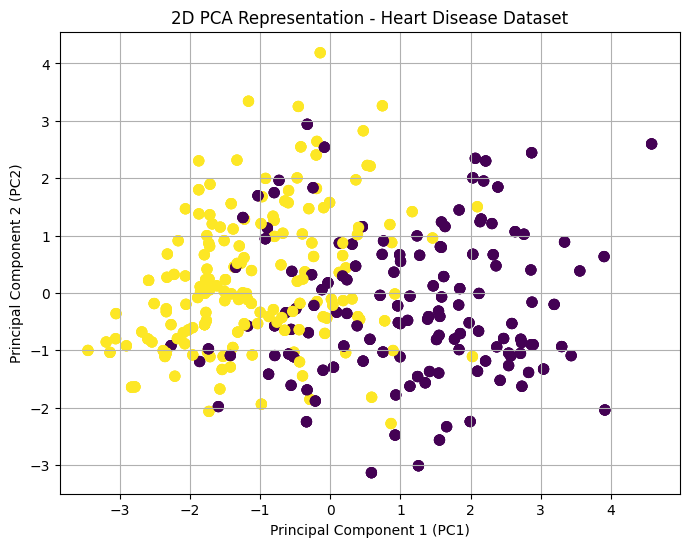

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    s=50
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("2D PCA Representation - Heart Disease Dataset")
plt.grid(True)
plt.show()

a. Makna Hasil 1

Visualisasi PCA di atas menunjukkan sebaran data pasien dalam dua komponen utama (PC1 dan PC2) setelah reduksi dimensi.

Titik-titik pada plot ini merepresentasikan masing-masing pasien, dan warnanya menunjukkan apakah pasien tersebut memiliki penyakit jantung (target = 1) atau tidak (target = 0).

Tujuan dari visualisasi ini adalah untuk melihat apakah ada pola pengelompokan yang jelas antara pasien yang sehat dan yang sakit dalam ruang 2D yang telah direduksi ini.

Jika ada pemisahan yang jelas antara kedua kelompok warna, berarti PCA berhasil memisahkan karakteristik utama yang membedakan pasien dengan atau tanpa penyakit jantung.



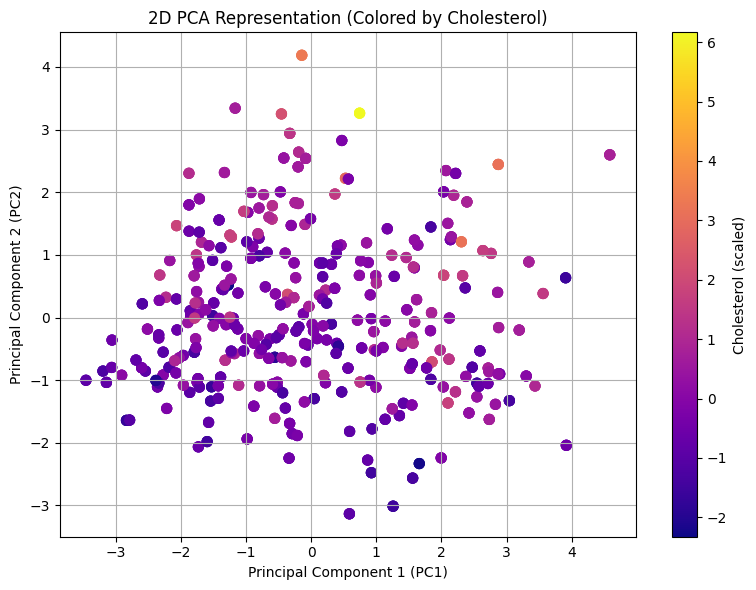

In [77]:
feature_name = 'chol'
feature_index = X.columns.get_loc(feature_name)

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=X_scaled[:, feature_index],
    cmap='plasma',
    s=50
)

ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_title('2D PCA Representation (Colored by Cholesterol)')
ax.grid(True)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cholesterol (scaled)')

plt.tight_layout()
plt.show()

b. Makna Hasil 2

Visualisasi PCA ini menunjukkan sebaran data pasien dalam dua komponen utama (PC1 dan PC2), di mana setiap titik merepresentasikan seorang pasien.
        
Warna pada setiap titik menggambarkan tingkat kolesterol (chol) pasien setelah standarisasi. Skala warna (colorbar) menunjukkan rentang nilai kolesterol dari rendah (ungu gelap) hingga tinggi (kuning terang).

Tujuan dari visualisasi ini adalah untuk melihat bagaimana tingkat kolesterol terdistribusi dalam ruang PCA yang telah direduksi.
Dengan mengamati pola warna, kita dapat mengetahui apakah ada kecenderungan pasien dengan tingkat kolesterol tinggi atau rendah mengumpul pada area tertentu dalam plot 2D ini.
Ini dapat memberikan wawasan awal tentang hubungan antara kolesterol dengan komponen utama yang menangkap variabilitas terbesar dalam dataset.



**6. t-Distributed Stochastic Neighbor Embedding (t-SNE)**



*   Menerapkan t-SNE (Reduksi Ke 2 Dimensi)



In [78]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(




*   Visualisasi t-SNE



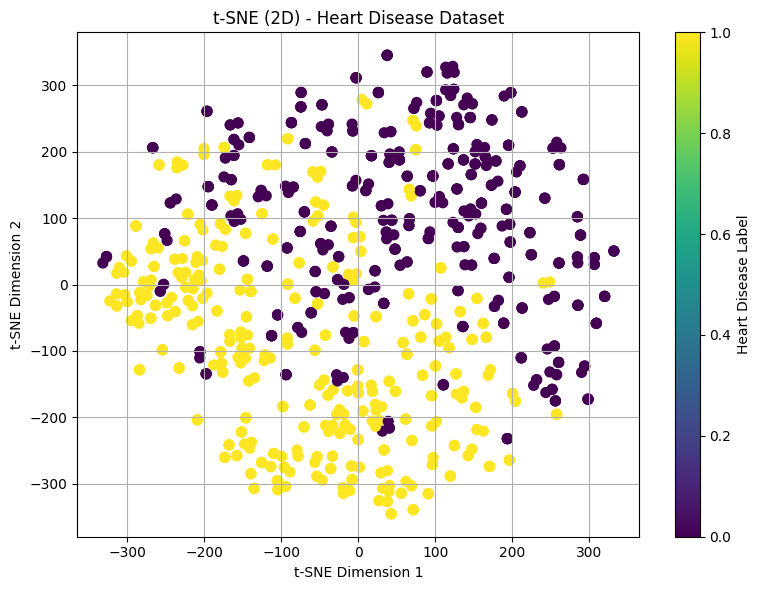

In [79]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap='viridis',
    s=50
)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE (2D) - Heart Disease Dataset")

cbar = plt.colorbar(scatter)
cbar.set_label("Heart Disease Label")

plt.grid(True)
plt.tight_layout()
plt.show()

a. Makna Hasil 1
        
Visualisasi t-SNE ini menunjukkan data pasien dalam 2 dimensi, di mana setiap titik adalah pasien dan warnanya menandakan status penyakit jantung (sakit atau tidak).

Terdapat pola karakteristik medis yang membedakan kedua kelompok tersebut, yang t-SNE bisa tangkap.


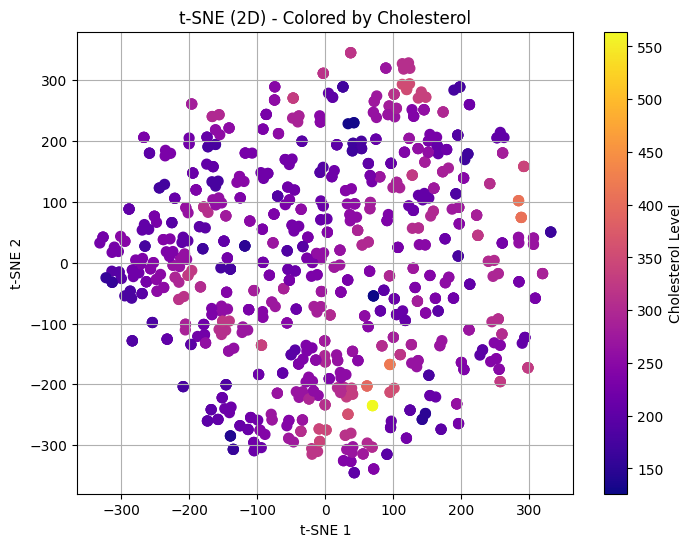

In [80]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=X['chol'],
    cmap='plasma',
    s=50
)

plt.colorbar(scatter, label='Cholesterol Level')
plt.title('t-SNE (2D) - Colored by Cholesterol')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

b. Makna Hasil 2

Visualisasi t-SNE ini menunjukkan sebaran data pasien dalam dua dimensi t-SNE, dengan setiap titik mewakili seorang pasien. Perbedaan dari visualisasi t-SNE sebelumnya adalah bahwa warna pada setiap titik kini menggambarkan tingkat kolesterol (Cholesterol Level) pasien.

Skala warna menunjukkan rentang nilai kolesterol, biasanya dari yang terendah (misalnya, ungu gelap) hingga tertinggi (misalnya, kuning terang).

Tujuan dari visualisasi ini adalah untuk mengamati apakah ada pola pengelompokan yang jelas berdasarkan tingkat kolesterol dalam ruang t-SNE. Dengan kata lain, kita mencari tahu apakah pasien dengan tingkat kolesterol yang mirip cenderung berkumpul bersama di satu area dalam plot, terlepas dari status penyakit jantung mereka. Jika terlihat ada cluster dengan warna yang homogen (misalnya, satu cluster didominasi warna kuning cerah yang berarti kolesterol tinggi, sementara cluster lain didominasi warna ungu gelap yang berarti kolesterol rendah), ini menunjukkan bahwa kolesterol adalah faktor penting yang berkontribusi pada pembentukan cluster dalam data.

Pola ini dapat memberikan wawasan mengenai bagaimana tingkat kolesterol berelasi dengan struktur intrinsik data pasien.

**D. ANALISIS SINGKAT**

**1. Perbedaan Hasil PCA dan t-SNE**

PCA melakukan reduksi dimensi secara linear dengan mempertahankan variasi data terbesar, sehingga hasil visualisasinya menunjukkan struktur global data dan hubungan antar fitur secara keseluruhan. Pada dataset penyakit jantung, PCA menghasilkan sebaran data yang masih saling tumpang tindih antara kelas sehat dan penderita, menandakan bahwa pemisahan kelas secara linear tidak terlalu kuat.
Sebaliknya, t-SNE merupakan metode non-linear yang menekankan pelestarian struktur lokal, sehingga mampu menampilkan pola pengelompokan data yang lebih jelas. Visualisasi t-SNE menunjukkan adanya kecenderungan cluster lokal meskipun masih terdapat overlap antar kelas, yang mencerminkan kompleksitas hubungan fitur medis pada data penyakit jantung.

**2. Metode Paling Sesuai**

Untuk kasus eksplorasi dan visualisasi data penyakit jantung, t-SNE lebih sesuai karena mampu menampilkan pola lokal dan potensi pengelompokan pasien berdasarkan kemiripan karakteristik medis. Metode ini membantu memahami struktur data secara intuitif meskipun tidak digunakan untuk interpretasi fitur secara langsung.
Namun, PCA lebih sesuai digunakan sebagai tahap awal analisis atau pra-pemodelan, karena hasilnya stabil, mudah diinterpretasikan, dan mempertahankan informasi global data. Oleh karena itu, PCA cocok untuk reduksi fitur sebelum modeling, sedangkan t-SNE lebih tepat untuk eksplorasi dan visualisasi pola data.